In [27]:
from apps.onedimensional.shallowwatermomentequations import shallow_water_moment_equations
from apps.onedimensional.shallowwatermomentequations.dambreakexample import dam_break_example
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.visualize import plot

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Dam Break Example

In [29]:
num_moments = 1
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

left_height = 1.0
left_velocity = 0.5
left_linear_coefficient = 0.2
left_quadratic_coefficient = 0.0
left_cubic_coefficient = 0.0

right_height = 0.1
right_velocity = 0.2
right_linear_coefficient = 0.1
right_quadratic_coefficient = 0.0
right_cubic_coefficient = 0.0
primitive_left_states = [
    left_height,
    left_velocity,
    left_linear_coefficient,
    left_quadratic_coefficient,
    left_cubic_coefficient,
]
primitive_right_states = [
    right_height,
    right_velocity,
    right_linear_coefficient,
    right_quadratic_coefficient,
    right_cubic_coefficient,
]
discontinuity_location = 0.0

problem = dam_break_example.DamBreakExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    primitive_left_states[: (num_moments + 2)],
    primitive_right_states[: (num_moments + 2)],
    discontinuity_location,
)
    
time_final = 1.2
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["num_frames"] = 5
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 800
x_left = -2.0
x_right = 2.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "extrapolation"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

#cfl = explicit_runge_kutta.get_cfl(space_time_order)
cfl = 0.5
delta_x = (x_right - x_left) / num_elems
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, delta_x))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [30]:
final_solution = main.run(problem);

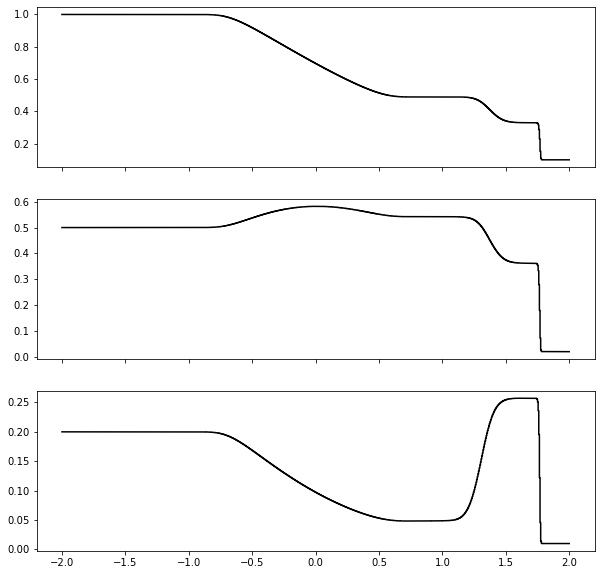

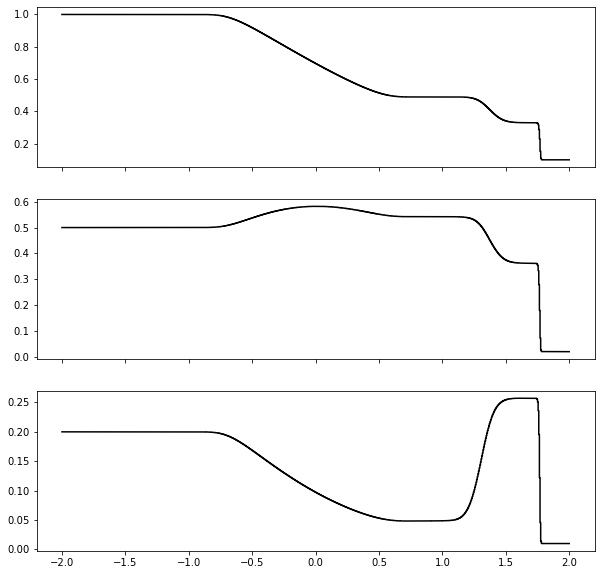

In [31]:
#p = plot.create_plot_dg_1d(final_solution, transformation=shallow_water_moment_equations.get_primitive_variables)
#ani, fig = plot.create_animation_output_dir(problem.output_dir, transformation=shallow_water_moment_equations.get_primitive_variables)
p = plot.create_plot_dg_1d(final_solution)
ani, fig = plot.create_animation_output_dir(problem.output_dir)
HTML(ani.to_html5_video())

## Discontinuous Galerkin Test with Local Lax Friedrichs Riemann Solver

### Wrong wave speeds in linear coefficient

In [22]:
num_moments = 1

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

left_height = 1.0
left_velocity = 0.5
left_linear_coefficient = 0.5
right_height = 0.1
right_velocity = 0.0
right_linear_coefficient = 0.3
primitive_left_states = [left_height, left_velocity, left_linear_coefficient]
primitive_right_states = [right_height, right_velocity, right_linear_coefficient]
discontinuity_location = 0.0

problem_dg_llf = dam_break_example.DamBreakExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    primitive_left_states,
    primitive_right_states,
    discontinuity_location,
)

time_final = 0.3
problem_dg_llf.parameters["time_final"] = time_final
problem_dg_llf.parameters["is_weak"] = True

space_time_order = 1
problem_dg_llf.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem_dg_llf.parameters["time_stepping"]["is_verbose"] = False
problem_dg_llf.parameters["time_stepping"]["order"] = space_time_order

num_elems = 300
x_left = -1.0
x_right = 1.0
problem_dg_llf.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem_dg_llf.parameters["mesh"]["x_left"] = x_left
problem_dg_llf.parameters["mesh"]["x_right"] = x_right
problem_dg_llf.parameters["mesh"]["num_elems"] = num_elems

problem_dg_llf.parameters["basis"]["basis_class"] = "legendre"
problem_dg_llf.parameters["basis"]["inner_product_constant"] = 0.5
problem_dg_llf.parameters["basis"]["num_basis_cpts"] = space_time_order

problem_dg_llf.parameters["boundary_condition"]["boundary_condition_class"] = "extrapolation"
problem_dg_llf.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

#cfl = dg_utils.standard_cfls(space_time_order)
cfl = 0.5
problem_dg_llf.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem_dg_llf.max_wavespeed, (x_right - x_left) / num_elems))

# main.run also does this
main.setup_objects(problem_dg_llf);

In [23]:
final_solution_dg_llf = main.run(problem_dg_llf);

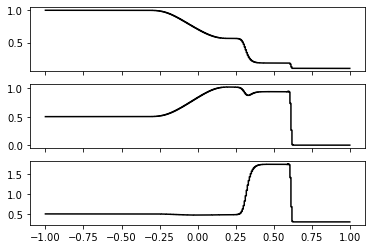

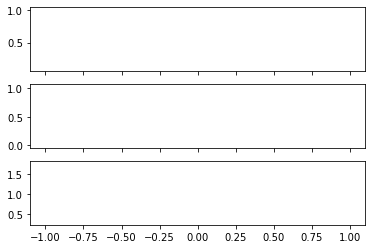

In [24]:
p = plot.create_plot_dg_1d(final_solution_dg_llf, transformation=shallow_water_moment_equations.get_primitive_variables)
ani, fig = plot.create_animation_output_dir(problem_dg_llf.output_dir, transformation=shallow_water_moment_equations.get_primitive_variables)
HTML(ani.to_html5_video())

## Finite Volume Test

In [28]:
num_moments = 1

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

left_height = 1.0
left_velocity = 0.5
left_linear_coefficient = 0.5
right_height = 0.1
right_velocity = 0.0
right_linear_coefficient = 0.3
primitive_left_states = [left_height, left_velocity, left_linear_coefficient]
primitive_right_states = [right_height, right_velocity, right_linear_coefficient]
discontinuity_location = 0.0

problem_fv = dam_break_example.DamBreakExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    primitive_left_states,
    primitive_right_states,
    discontinuity_location,
)

time_final = 0.3

problem_fv.output_dir = "output_finite_volume_reference"

problem_fv.parameters["time_final"] = time_final
problem_fv.parameters["is_weak"] = True
problem_fv.parameters["use_wave_propagation_method"] = True

space_time_order = 1
problem_fv.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem_fv.parameters["time_stepping"]["is_verbose"] = False
problem_fv.parameters["time_stepping"]["order"] = space_time_order
problem_fv.parameters["time_stepping"]["num_frames"] = 30

num_elems = 1000
x_left = -1.0
x_right = 1.0
problem_fv.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem_fv.parameters["mesh"]["x_left"] = x_left
problem_fv.parameters["mesh"]["x_right"] = x_right
problem_fv.parameters["mesh"]["num_elems"] = num_elems

problem_fv.parameters["basis"]["basis_class"] = "legendre"
problem_fv.parameters["basis"]["inner_product_constant"] = 0.5
problem_fv.parameters["basis"]["num_basis_cpts"] = space_time_order

problem_fv.parameters["boundary_condition"]["boundary_condition_class"] = "extrapolation"
problem_fv.parameters["fluctuation_solver"]["fluctuation_solver_class"] = "roe"

#cfl = dg_utils.standard_cfls(space_time_order)
cfl = 0.5
problem_fv.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem_fv.max_wavespeed, (x_right - x_left) / num_elems))

# main.run also does this
main.setup_objects(problem_fv);

In [29]:
final_solution_fv = main.run(problem_fv);

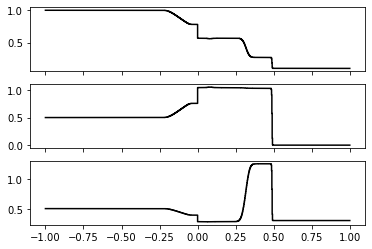

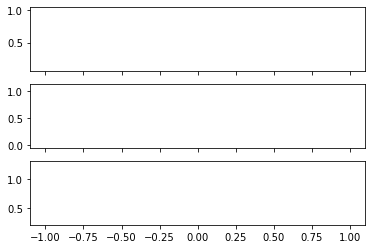

In [31]:
p = plot.create_plot_dg_1d(final_solution_fv, transformation=shallow_water_moment_equations.get_primitive_variables)
ani, fig = plot.create_animation_output_dir(problem_fv.output_dir, transformation=shallow_water_moment_equations.get_primitive_variables)
HTML(ani.to_html5_video())

## Discontinuous Galerkin Test with Nonconservative Riemann Solver

In [35]:
num_moments = 1

gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

left_height = 1.0
left_velocity = 0.5
left_linear_coefficient = 0.5
right_height = 0.1
right_velocity = 0.0
right_linear_coefficient = 0.3
primitive_left_states = [left_height, left_velocity, left_linear_coefficient]
primitive_right_states = [right_height, right_velocity, right_linear_coefficient]
discontinuity_location = 0.0

problem_dg_nc = dam_break_example.DamBreakExample(
    num_moments,
    gravity_constant,
    kinematic_viscosity,
    slip_length,
    primitive_left_states,
    primitive_right_states,
    discontinuity_location,
)

time_final = 0.3
problem_dg_nc.parameters["time_final"] = time_final
problem_dg_nc.parameters["is_weak"] = True

space_time_order = 1
problem_dg_nc.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem_dg_nc.parameters["time_stepping"]["is_verbose"] = False
problem_dg_nc.parameters["time_stepping"]["num_frames"] = 30
problem_dg_nc.parameters["time_stepping"]["order"] = space_time_order

num_elems = 300
x_left = -1.0
x_right = 1.0
problem_dg_nc.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem_dg_nc.parameters["mesh"]["x_left"] = x_left
problem_dg_nc.parameters["mesh"]["x_right"] = x_right
problem_dg_nc.parameters["mesh"]["num_elems"] = num_elems

problem_dg_nc.parameters["basis"]["basis_class"] = "legendre"
problem_dg_nc.parameters["basis"]["inner_product_constant"] = 0.5
problem_dg_nc.parameters["basis"]["num_basis_cpts"] = space_time_order

problem_dg_nc.parameters["boundary_condition"]["boundary_condition_class"] = "extrapolation"
problem_dg_nc.parameters["riemann_solver"]["riemann_solver_class"] = "nonconservative_hlle"

#cfl = dg_utils.standard_cfls(space_time_order)
cfl = 0.5
problem_dg_nc.parameters["delta_t"] = float(dg_utils.get_delta_t(cfl, problem_dg_nc.max_wavespeed, (x_right - x_left) / num_elems))
main.setup_objects(problem_dg_nc);

In [36]:
final_solution_dg_nc = main.run(problem_dg_nc);

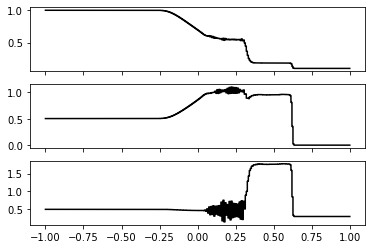

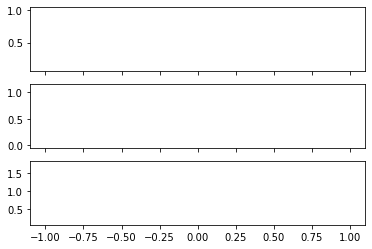

In [37]:
p = plot.create_plot_dg_1d(final_solution_dg_nc, transformation=shallow_water_moment_equations.get_primitive_variables)
ani, fig = plot.create_animation_output_dir(problem_dg_nc.output_dir, transformation=shallow_water_moment_equations.get_primitive_variables)
HTML(ani.to_html5_video())